# 1. Contextualização 

O dataset Telco Customer Churn contêm informações sobre uma empresa fictícia de telecomunicações que forneceu serviços de telefone residencial e Internet para 7043 clientes na Califórnia no terceiro trimestre. Eles indicam quais clientes deixaram, permaneceram ou se inscreveram para os seus serviços. Os dados podem ser encontrados no [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) e foram disponibilizados por [BlastChar](https://www.kaggle.com/blastchar).

### Features
|Coluna|Descrição|
|---|---|
|`customerID`|Identificador único dos clientes|
|`gender`|Gênero|
|`SeniorCitizen`|É idoso?|
|`Partner`|Possui parceiro?|
|`Dependents`|Possui dependentes?|
|`tenure`|Tempo de relacionamento (em meses)|
|`PhoneService`|Possui serviço telefonico?|
|`MultipleLines`|Possui multiplas linhas?(Sim, não, não possui serviço telefonico)|
|`InternetService`|Provedor de serviços de internet (DSL, Fibra ou não)|
|`OnlineSecurity`|Possui seguro online?|
|`OnlineBackup`|Possui backup online?|
|`DeviceProtection`|Possui proteção do dispositivo?|
|`TechSupport`|Tem suporte técnico?|
|`StreamingTV`|Possui streaming de TV?|
|`StreamingMovies`|Possui streaming de Filmes?|
|`Contract`|Tipo de contrato(mês-a-mês, anual ou bi-anual)|
|`PaperlessBilling`|Recebe boletos?|
|`PaymentMethod`|Método de pagamento|
|`MonthlyCharges`|Taxa de serviço|
|`TotalCharges`|Total pago pelo cliente|
|`Churn`|Alvo|

## 1.1. Metas e objetivos

Este projeto tem o intuíto de realizar uma breve análise exploratória e construir um modelo de Machine Learning para predição de Churn.

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [97]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Dark2')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [50]:
df = pd.read_csv("../data/raw/telcocustomerchurn.csv")

## 2.2. Qualidade dos dados

In [51]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 7043 linhas e 21 colunas.


In [52]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 18 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [53]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [56]:
df.isnull().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

#### Algumas observações

- `TotalCharges` precisa ter o dtype corrigido;
- O dataset não aparenta ter nulos mas vamos buscar observar após a correção em `TotalCharges`.

In [57]:
# Convertendo o dtype de TotalCharges

df.TotalCharges = df.TotalCharges.replace(' ', np.nan)
df.TotalCharges = df.TotalCharges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Exploratory Data Analysis

## 3.1. Estatísticas descritivas

In [58]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


- Existe uma baixa quantidade de clientes idosos.
- Na média os clientes estão cadastrados a mais de 2 anos.
- A média dos serviços do preço dos serviços é de 64,76 USD.

## 3.2. Dados nulos

In [59]:
missing = df.isnull().sum().reset_index()
missing.rename(columns = {'index': 'Coluna', 0: 'Nulos'}, inplace = True)
missing[missing['Nulos'] > 0]

,Coluna,Nulos
19,TotalCharges,11


Existem 11 nulos em ``TotalCharges``, a estratégia de imputação será a mediana.

## 3.3. Comportamento do target

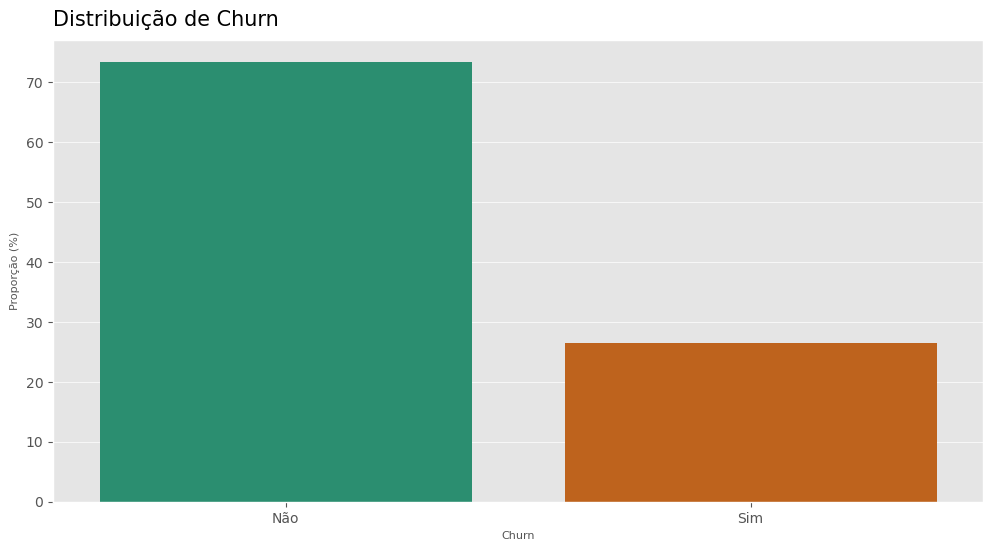

In [72]:
fig, ax = plt.subplots(figsize = (12 ,6))

sns.countplot(x = df.Churn, hue = df.Churn, stat = 'percent')
ax.set_title("Distribuição de Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

A taxa de Churn na Telco Telecom é de mais de 26%.

### Target x Features

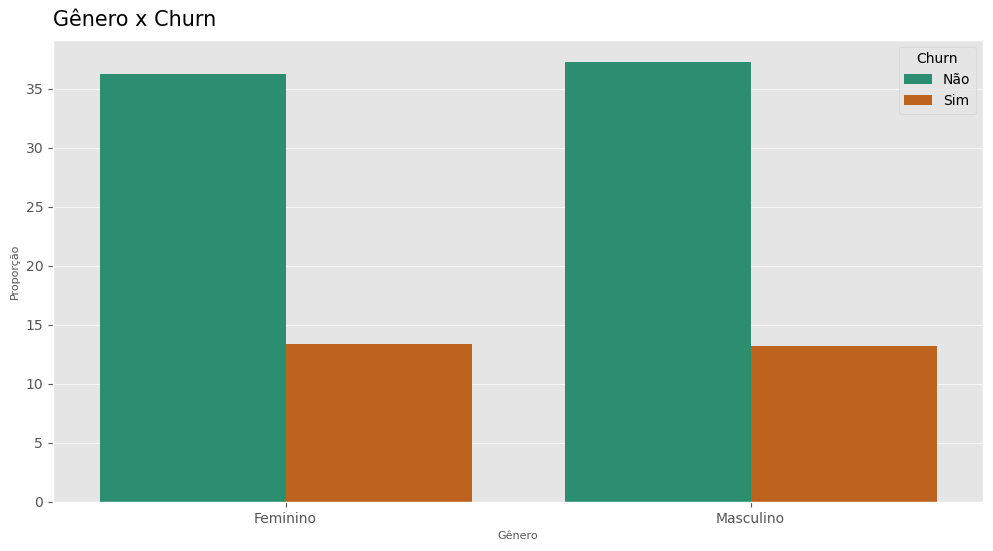

In [73]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.gender, hue = df.Churn, stat = 'percent')
ax.set_title("Gênero x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Gênero", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Feminino', 'Masculino'])
ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
plt.show()

Clientes com maior tempo de relacionamento tendem a ficar mais tempo na Telco, é necessário investigar a qualidade do atendimento a novos contratantes.

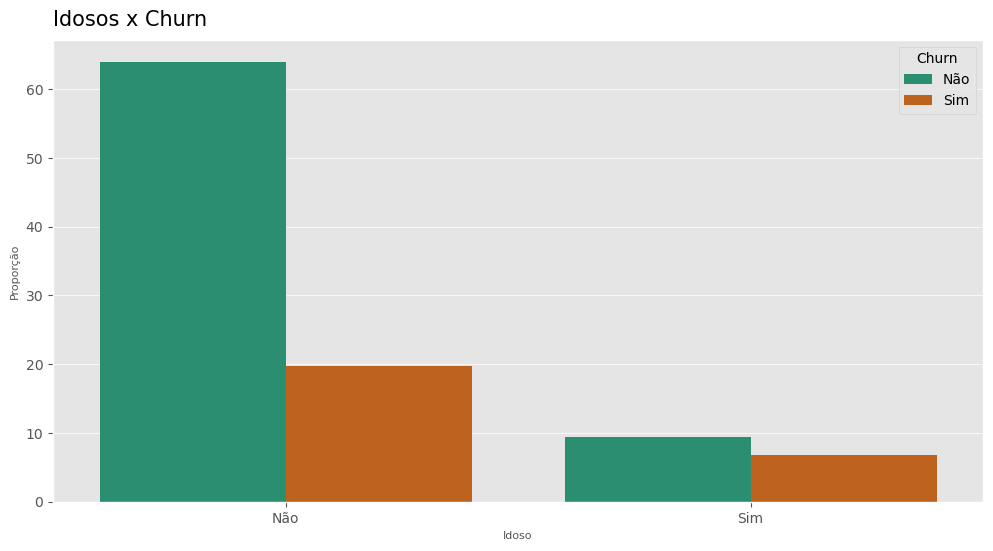

In [74]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.SeniorCitizen, hue = df.Churn, stat = 'percent')
ax.set_title("Idosos x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Idoso", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
plt.show()

Clientes idosos tem uma maior proporção de Churn em relação ao seu volume dentro da base de dados. 

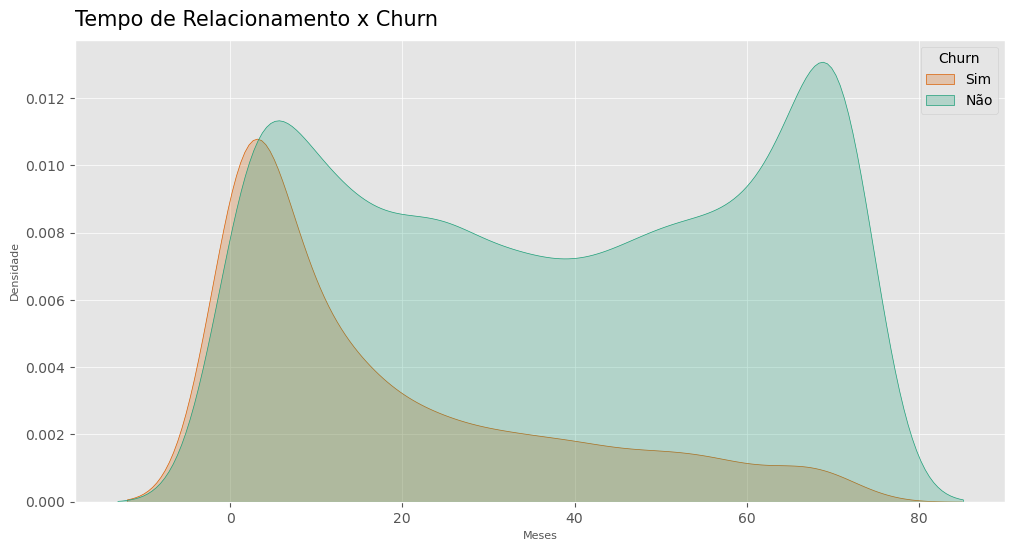

In [81]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(x = df.tenure, hue = df.Churn, fill = True)
ax.set_title("Tempo de Relacionamento x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Meses", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Churn', labels = ['Sim', 'Não'])
plt.show()

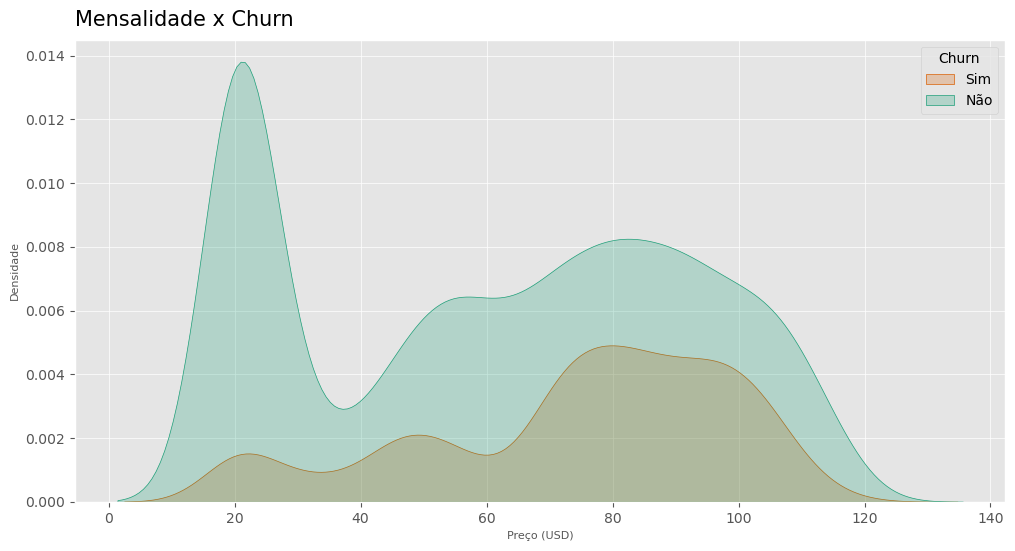

In [83]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(x = df.MonthlyCharges, hue = df.Churn, fill = True)
ax.set_title("Mensalidade x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Preço (USD)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Churn', labels = ['Sim', 'Não'])
plt.show()

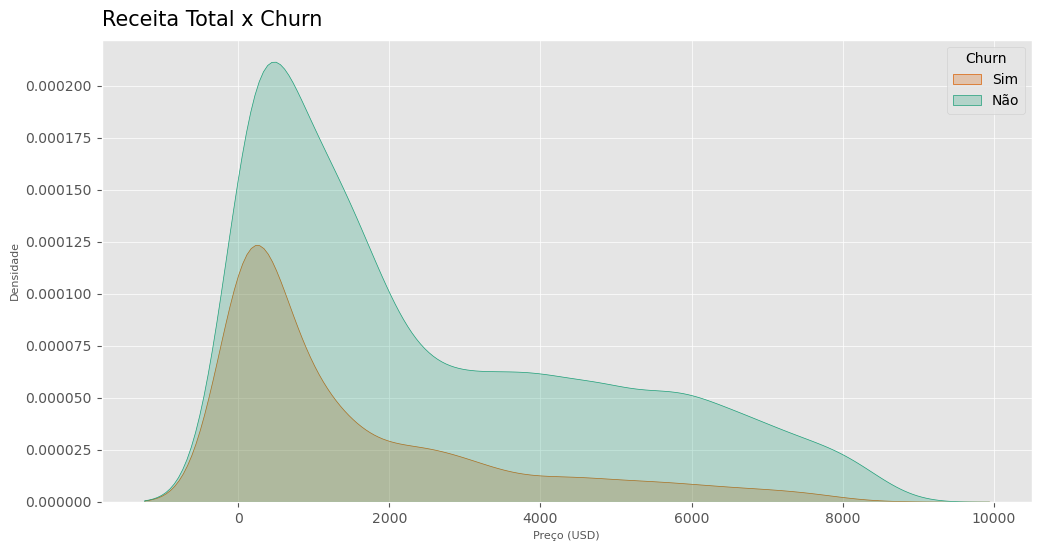

In [84]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(x = df.TotalCharges, hue = df.Churn, fill = True)
ax.set_title("Receita Total x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Preço (USD)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
ax.legend(title = 'Churn', labels = ['Sim', 'Não'])
plt.show()

Clientes com maior tempo de contrato, tem tendência a permanecer e portanto geram maior receita total. Vamos observar agora em relação ao tipo de contrato.

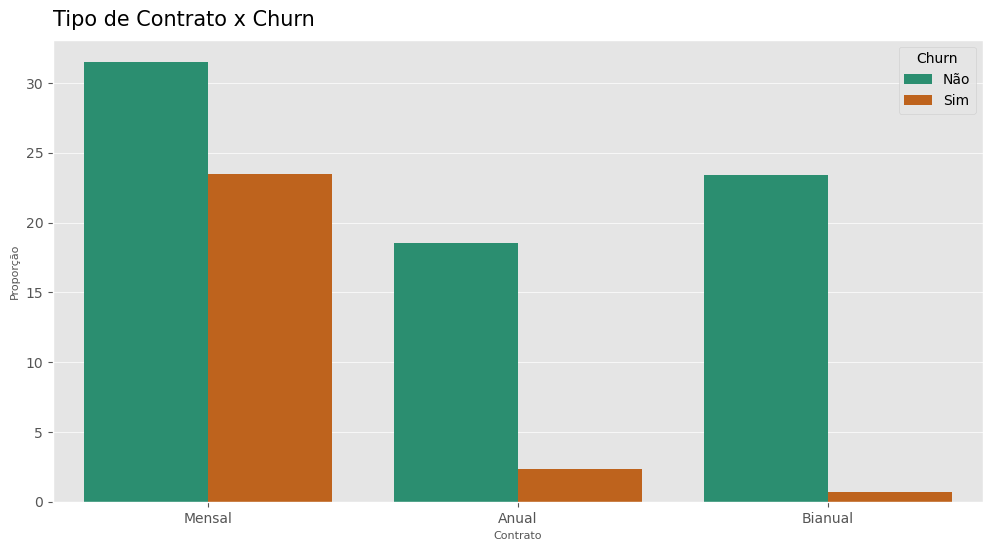

In [88]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.Contract, hue = df.Churn, stat = 'percent')
ax.set_title("Tipo de Contrato x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Contrato", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Mensal', 'Anual', 'Bianual'])
ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
plt.show()

Contratos de duração mais longa tem uma menor proporção de Churn, existe um volume alto em contratos de renovação mensal. Uma sugestão seria a disponibilização de contratos semestrais. 

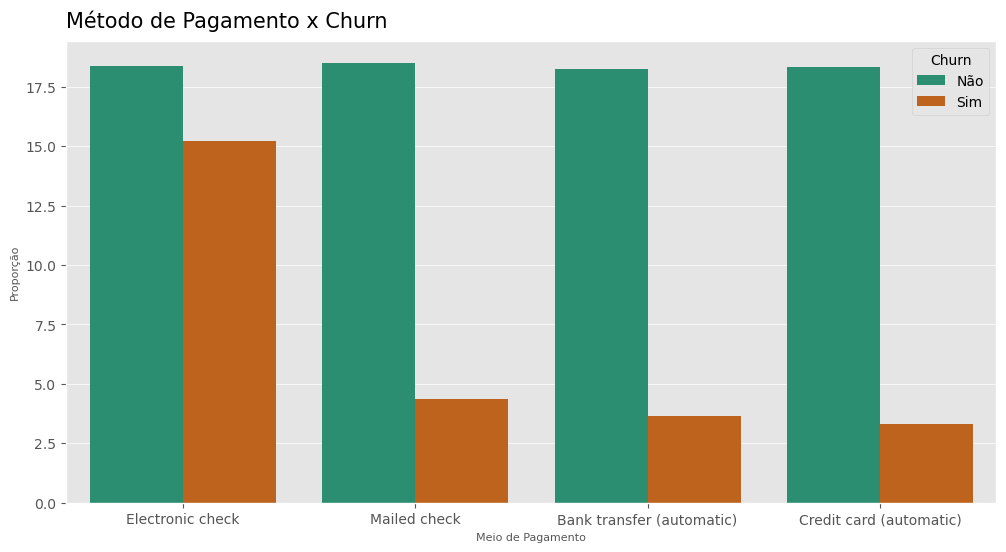

In [90]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.PaymentMethod, hue = df.Churn, stat = 'percent')
ax.set_title("Método de Pagamento x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Meio de Pagamento", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
plt.show()

Clientes que optam por meios automaticos de pagamento tem menor tendência de deixar os serviços da Telco, esses meios devem ser incentivados. Métodos de pagamento com chekc-up, especialmente o Electronic check tem alta proporção de Churn.

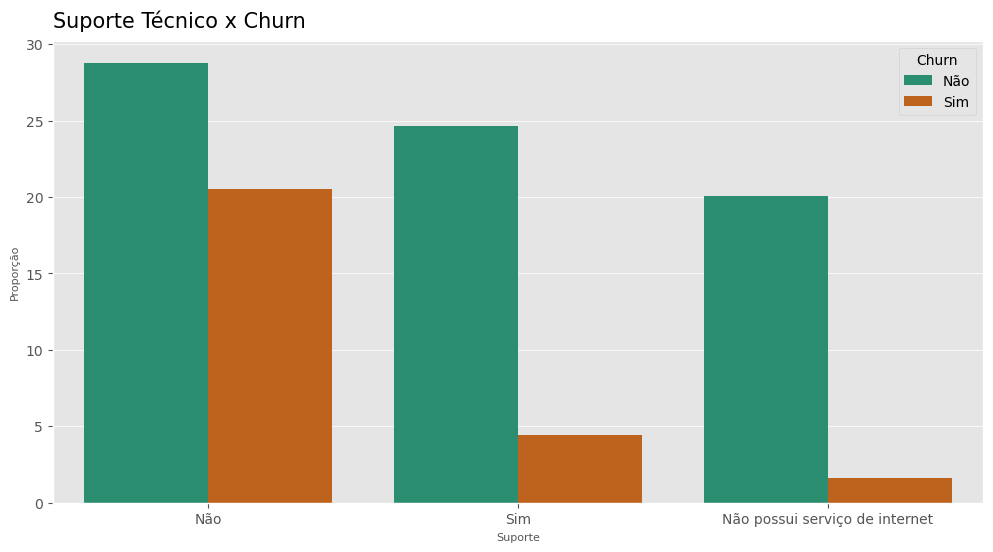

In [93]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.TechSupport, hue = df.Churn, stat = 'percent')
ax.set_title("Suporte Técnico x Churn", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Suporte", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim', 'Não possui serviço de internet'])
ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
plt.show()

A ausência de suporte técnico é um fator relevante para o Churn também. 

## 3.4. Conclusões da Análise Exploratória

- Clientes com maior tempo de contrato tem maior probabilidade de permanecer utilizando os serviços da Telco, é interessante premiar ou realizar ações de marketing com estes;
- Idosos tem uma proporção grande de Churn em relação ao seu volume dentro da base, devem ser tomadas ações em relação isso;
- É necessário buscar melhorar os serviços para: (1) novos clientes, (2) clientes com maior valor de taxas de serviço;
- Oferer um plano semestral pode estimular clientes da modalidade mês-a-mês a fazerem contratos mais longos (que sãos os com menor probabilida de de Churn);
- Oferta de serviços como suporte técnico tem peso na permanência dos clientes, deve-se buscar formas de facilitar o acesso. 